In [2]:
import tensorflow as tf
import edward as ed
from edward.models import Normal

from keras.layers import Dense
from keras.models import Sequential
from keras.activations import tanh
import keras.backend as K

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style('oceans16')
%matplotlib inline

C:\Users\ares\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


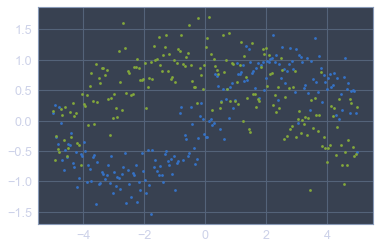

In [3]:
N = 200 # data size
D = 2 # n. features

x = np.linspace(-5, 5, N)
y_train = np.zeros((N, D))
y_train[:,0] = np.sin(0.6*x) + 0.3*np.random.randn(N)
y_train[:,1] = np.cos(0.4*x+0.2) + 0.4*np.random.randn(N)
plt.plot(x, y_train,'.')
x = np.expand_dims(x, axis=1)

In [150]:
x_ = tf.placeholder(tf.float32, [N, 1])
w = Normal(loc=tf.zeros([1,D]), scale=tf.ones([1,D]))
b = Normal(loc=tf.zeros(D), scale=tf.ones(D))
# M = Normal(loc=tf.ones(1), scale=tf.ones(1))
y = Normal(loc=tf.sin(tf.matmul(x_, w)+b), scale=0.3*tf.ones([N, D]))

In [151]:
qw = Normal(loc=tf.Variable(tf.random_normal([1,D])),
           scale=tf.nn.softplus(tf.Variable(tf.ones([1,D]))))
qb = Normal(loc=tf.Variable(tf.random_normal([D])),
           scale=tf.nn.softplus(tf.Variable(tf.ones([D]))))

In [66]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [152]:
latent_vars = {w: qw, b: qb}
# inference = ed.KLqp({w: qw, b: qb}, data={x_ : x, y: y_train})
inference = ed.KLqp(latent_vars, data={x_ : x, y: y_train})


C:\Users\ares\Anaconda3\envs\py35\lib\site-packages\edward\util\random_variables.py:52: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  not np.issubdtype(value.dtype, np.float) and \


In [153]:
inference.run(n_samples=5, n_iter=1200)

1200/1200 [100%] ██████████████████████████████ Elapsed: 5s | Loss: 163.992


In [103]:
w_ = qw.sample(100).eval()
b_ = qb.sample(100).eval()

In [154]:
y_pred = ed.copy(y, {w: qw, b: qb})

In [155]:
yy = np.mean(y_pred.sample(100).eval(feed_dict={x_: x}), axis=0)

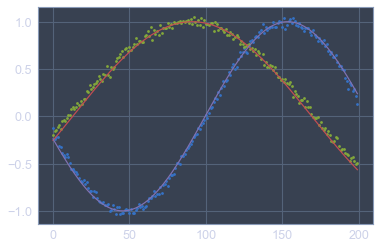

In [156]:
plt.plot(yy,'.')
# plt.plot(y_train,'.')
plt.plot(np.sin(-0.4*x + 1.4))
plt.plot(np.sin(0.58*x + 0))

In [157]:
ww = np.squeeze(qw.sample(100).eval())

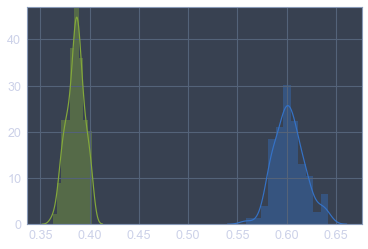

In [158]:
sns.distplot(ww[:,0])
sns.distplot(ww[:,1])

In [159]:
bb = np.squeeze(qb.sample(100).eval())

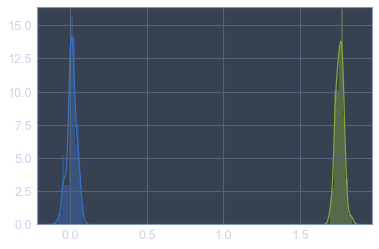

In [160]:
sns.distplot(bb[:,0])
sns.distplot(bb[:,1])

In [133]:
yy.shape

(100, 200, 2)